In [2]:
# pandasをインポート
import pandas as pd

# マスタデータをインポート
customer_master = pd.read_csv('customer_master.csv')
item_master = pd.read_csv('item_master.csv')

In [3]:
# マスタデータの中身を確認
print("顧客マスタ")
display(customer_master.head())
print("商品マスタ")
display(item_master.head())

顧客マスタ


,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


商品マスタ


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [4]:
# 取引履歴をそれぞれ結合して、データフレームに
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_2 = pd.read_csv('transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
print("取引履歴")
transaction.head()

取引履歴


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [5]:
# 取引詳細をそれぞれ結合して、データフレームに
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
print("詳細履歴")
transaction_detail.head()

詳細履歴


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


# 詳細履歴と商品マスタを結合して、自分で分析してみる

In [6]:
join_data1 = pd.merge(transaction_detail, item_master, on="item_id", how="left")
join_data1.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price
0,0,T0000000113,S005,1,PC-E,210000
1,1,T0000000114,S001,1,PC-A,50000
2,2,T0000000115,S003,1,PC-C,120000
3,3,T0000000116,S005,1,PC-E,210000
4,4,T0000000117,S002,2,PC-B,85000


In [7]:
# 金額の合計列を追加する
join_data1["price"] = join_data1["quantity"] * join_data1["item_price"]
join_data1.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price
0,0,T0000000113,S005,1,PC-E,210000,210000
1,1,T0000000114,S001,1,PC-A,50000,50000
2,2,T0000000115,S003,1,PC-C,120000,120000
3,3,T0000000116,S005,1,PC-E,210000,210000
4,4,T0000000117,S002,2,PC-B,85000,170000


In [8]:
# 商品ごとの売上を集計する
join_data1.groupby("item_name")["price"].sum()

,price
item_name,
PC-A,152150000
PC-B,151725000
PC-C,122640000
PC-D,162000000
PC-E,382620000


<Axes: xlabel='item_name'>

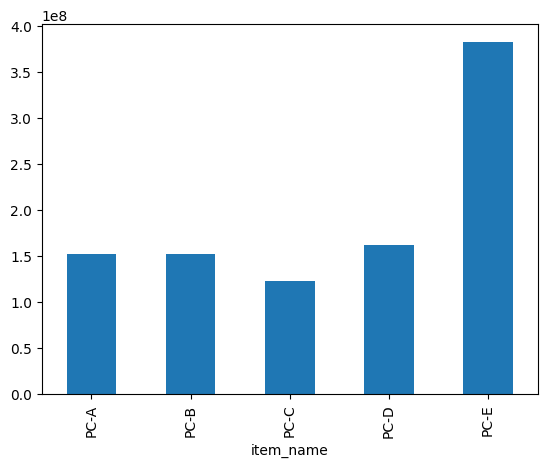

In [9]:
# 縦棒グラフで可視化
# pandasの標準機能でこんなこともできる（これで十分では..）
join_data1.groupby("item_name")["price"].sum().plot(kind="bar")

<Axes: ylabel='item_name'>

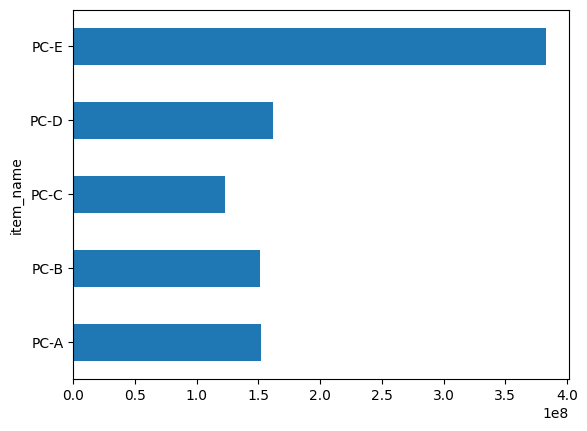

In [10]:
# 横棒グラフにする
join_data1.groupby("item_name")["price"].sum().plot(kind="barh")

# join_data1に対して、日付の情報も加えて分析する

In [11]:
join_data1.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price
0,0,T0000000113,S005,1,PC-E,210000,210000
1,1,T0000000114,S001,1,PC-A,50000,50000
2,2,T0000000115,S003,1,PC-C,120000,120000
3,3,T0000000116,S005,1,PC-E,210000,210000
4,4,T0000000117,S002,2,PC-B,85000,170000


In [12]:
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [13]:
# transaction_idで結合する
join_data2 = pd.merge(join_data1, transaction, on="transaction_id", how="left")
join_data2.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price_x,price_y,payment_date,customer_id
0,0,T0000000113,S005,1,PC-E,210000,210000,210000,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,PC-A,50000,50000,50000,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,PC-C,120000,120000,120000,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,PC-E,210000,210000,210000,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,PC-B,85000,170000,170000,2019-02-01 04:33:46,PL542865


In [14]:
# 不要な列を消す
join_data2 = join_data2.drop(columns=['price_y', 'customer_id'])
join_data2.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price_x,payment_date
0,0,T0000000113,S005,1,PC-E,210000,210000,2019-02-01 01:36:57
1,1,T0000000114,S001,1,PC-A,50000,50000,2019-02-01 01:37:23
2,2,T0000000115,S003,1,PC-C,120000,120000,2019-02-01 02:34:19
3,3,T0000000116,S005,1,PC-E,210000,210000,2019-02-01 02:47:23
4,4,T0000000117,S002,2,PC-B,85000,170000,2019-02-01 04:33:46


In [15]:
join_data2['payment_date'].dtype

dtype('O')

In [16]:
join_data2.dtypes

,0
detail_id,int64
transaction_id,object
item_id,object
quantity,int64
item_name,object
item_price,int64
price_x,int64
payment_date,object


In [17]:
# 日付型に変換する
join_data2['payment_date'] = pd.to_datetime(join_data2['payment_date'])
join_data2.dtypes

,0
detail_id,int64
transaction_id,object
item_id,object
quantity,int64
item_name,object
item_price,int64
price_x,int64
payment_date,datetime64[ns]


In [20]:
# 年月の列を追加する
join_data2["payment_month"] = join_data2["payment_date"].dt.strftime("%Y%m")
join_data2.head()

,detail_id,transaction_id,item_id,quantity,item_name,item_price,price_x,payment_date,payment_month
0,0,T0000000113,S005,1,PC-E,210000,210000,2019-02-01 01:36:57,201902
1,1,T0000000114,S001,1,PC-A,50000,50000,2019-02-01 01:37:23,201902
2,2,T0000000115,S003,1,PC-C,120000,120000,2019-02-01 02:34:19,201902
3,3,T0000000116,S005,1,PC-E,210000,210000,2019-02-01 02:47:23,201902
4,4,T0000000117,S002,2,PC-B,85000,170000,2019-02-01 04:33:46,201902


In [21]:
# 年月で値を集計する
join_data2.groupby("payment_month")["price_x"].sum()

,price_x
payment_month,
201902,160185000
201903,160370000
201904,160510000
201905,155420000
201906,164030000
201907,170620000


In [22]:
# 月別、商品別に集計する
join_data2.groupby(["payment_month", "item_name"])["price_x"].sum()

payment_month  item_name
201902         PC-A         24150000
               PC-B         25245000
               PC-C         19800000
               PC-D         31140000
               PC-E         59850000
201903         PC-A         26000000
               PC-B         25500000
               PC-C         19080000
               PC-D         25740000
               PC-E         64050000
201904         PC-A         25900000
               PC-B         23460000
               PC-C         21960000
               PC-D         24300000
               PC-E         64890000
201905         PC-A         24850000
               PC-B         25330000
               PC-C         20520000
               PC-D         25920000
               PC-E         58800000
201906         PC-A         26000000
               PC-B         23970000
               PC-C         21840000
               PC-D         28800000
               PC-E         63420000
201907         PC-A         25250000
               PC-B         28220000
               PC-C         19440000
               PC-D         26100000
               PC-E         71610000
Name: price_x, dtype: int64

In [23]:
# 月別、商品別に集計する（商品量も追加する）
join_data2.groupby(["payment_month", "item_name"])[["price_x", "quantity"]].sum()

price_x  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [24]:
pd.pivot_table(join_data2, index="item_name", columns="payment_month", values=["price_x", "quantity"], aggfunc="sum")

price_x                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

# 商品別の売上推移を可視化する

In [25]:
graph_data = pd.pivot_table(join_data2, index="payment_month", columns="item_name", values="price_x", aggfunc="sum")
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
